# Order And Stock Analysis (Inventory Data Project)

In [1]:
#Imported libaries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Read the data from excel file
past_orders_df = pd.read_excel('Inventory Data.xlsx', sheet_name = 'Past Orders')
stock_df = pd.read_excel('Inventory Data.xlsx', sheet_name = 'Stock')

In [3]:
past_orders_df

,Order Date,SKU ID,Order Quantity
0,2019-11-19 00:00:00,3084CA,1.000000
1,2019-06-30 00:00:00,2621AA,20.000000
2,2020-04-19 00:00:00,1193BA,147.000000
3,2020-05-21 00:00:00,1971AA,10.000000
4,2019-03-31 00:00:00,3177CA,56.250000
...,...,...,...
33914,43727,1308BA,3.431150
33915,43989,1296CA,6.913646
33916,43832,1295CA,1.142770
33917,43971,1283CA,0.619023


In [4]:
stock_df

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000
...,...,...,...,...,...,...
298,3579CA,116.0,Kg,120,187,86.65000
299,3590BA,145.0,Kg,120,160,115.08500
300,3610AA,275.0,Kg,120,188,156.16000
301,3616CA,331.0,Kg,120,167,433.10000


### Preprocessing the data

In [5]:
past_orders_df.head()

,Order Date,SKU ID,Order Quantity
0,2019-11-19 00:00:00,3084CA,1.00
1,2019-06-30 00:00:00,2621AA,20.00
2,2020-04-19 00:00:00,1193BA,147.00
3,2020-05-21 00:00:00,1971AA,10.00
4,2019-03-31 00:00:00,3177CA,56.25


In [6]:
past_orders_df.tail()

,Order Date,SKU ID,Order Quantity
33914,43727,1308BA,3.431150
33915,43989,1296CA,6.913646
33916,43832,1295CA,1.142770
33917,43971,1283CA,0.619023
33918,43958,1281BA,1.301662


In [7]:
past_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33919 entries, 0 to 33918
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      33919 non-null  object 
 1   SKU ID          33919 non-null  object 
 2   Order Quantity  33919 non-null  float64
dtypes: float64(1), object(2)
memory usage: 795.1+ KB


In [8]:
stock_df.head()

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000


In [9]:
stock_df.tail()

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
298,3579CA,116.0,Kg,120,187,86.6500
299,3590BA,145.0,Kg,120,160,115.0850
300,3610AA,275.0,Kg,120,188,156.1600
301,3616CA,331.0,Kg,120,167,433.1000
302,3619CA,36357.0,Kg,15,22,0.7455


In [10]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SKU ID                    303 non-null    object 
 1   Current Stock Quantity    303 non-null    float64
 2   Units (Nos/Kg)            303 non-null    object 
 3   Average Lead Time (days)  303 non-null    int64  
 4   Maximum Lead Time (days)  303 non-null    int64  
 5   Unit Price                303 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 14.3+ KB


In [11]:
past_orders_df.describe()

,Order Quantity
count,33919.000000
mean,432.793196
std,2382.904837
min,0.000015
25%,2.000000
50%,6.000000
75%,36.294959
max,111770.000000


In [12]:
stock_df.describe()

,Current Stock Quantity,Average Lead Time (days),Maximum Lead Time (days),Unit Price
count,303.000000,303.000000,303.000000,303.000000
mean,6586.761003,52.937294,76.834983,4202.477681
std,26520.156992,30.966004,44.787865,18313.509697
min,0.000000,15.000000,20.000000,0.102950
25%,22.000000,30.000000,43.000000,30.000000
50%,219.000000,45.000000,68.000000,140.000000
75%,1298.250000,60.000000,92.500000,906.166070
max,342553.000000,120.000000,192.000000,175000.000000


In [13]:
past_orders_df.shape

(33919, 3)

In [14]:
stock_df.shape

(303, 6)

In [15]:
past_orders_df.count() 

Order Date        33919
SKU ID            33919
Order Quantity    33919
dtype: int64

In [16]:
stock_df.count()

SKU ID                      303
Current Stock Quantity      303
Units (Nos/Kg)              303
Average Lead Time (days)    303
Maximum Lead Time (days)    303
Unit Price                  303
dtype: int64

In [17]:
past_orders_df.isnull().sum()

Order Date        0
SKU ID            0
Order Quantity    0
dtype: int64

In [18]:
stock_df.isnull().sum()

SKU ID                      0
Current Stock Quantity      0
Units (Nos/Kg)              0
Average Lead Time (days)    0
Maximum Lead Time (days)    0
Unit Price                  0
dtype: int64

In [19]:
past_orders_df.dropna()

,Order Date,SKU ID,Order Quantity
0,2019-11-19 00:00:00,3084CA,1.000000
1,2019-06-30 00:00:00,2621AA,20.000000
2,2020-04-19 00:00:00,1193BA,147.000000
3,2020-05-21 00:00:00,1971AA,10.000000
4,2019-03-31 00:00:00,3177CA,56.250000
...,...,...,...
33914,43727,1308BA,3.431150
33915,43989,1296CA,6.913646
33916,43832,1295CA,1.142770
33917,43971,1283CA,0.619023


In [20]:
stock_df.dropna()

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000
...,...,...,...,...,...,...
298,3579CA,116.0,Kg,120,187,86.65000
299,3590BA,145.0,Kg,120,160,115.08500
300,3610AA,275.0,Kg,120,188,156.16000
301,3616CA,331.0,Kg,120,167,433.10000


In [21]:
# Remove empty rows (if any are present in the data).
past_orders_df.drop(past_orders_df[past_orders_df.isnull().any(axis = 1)].index, inplace = True)
past_orders_df

,Order Date,SKU ID,Order Quantity
0,2019-11-19 00:00:00,3084CA,1.000000
1,2019-06-30 00:00:00,2621AA,20.000000
2,2020-04-19 00:00:00,1193BA,147.000000
3,2020-05-21 00:00:00,1971AA,10.000000
4,2019-03-31 00:00:00,3177CA,56.250000
...,...,...,...
33914,43727,1308BA,3.431150
33915,43989,1296CA,6.913646
33916,43832,1295CA,1.142770
33917,43971,1283CA,0.619023


In [22]:
# Remove empty rows (if any are present in the data).
stock_df.drop(stock_df[stock_df.isnull().any(axis = 1)].index, inplace = True)
stock_df

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000
...,...,...,...,...,...,...
298,3579CA,116.0,Kg,120,187,86.65000
299,3590BA,145.0,Kg,120,160,115.08500
300,3610AA,275.0,Kg,120,188,156.16000
301,3616CA,331.0,Kg,120,167,433.10000


In [23]:
past_orders_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33914    False
33915    False
33916    False
33917    False
33918    False
Length: 33919, dtype: bool

In [24]:
stock_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [25]:
#Remove duplicates (if any are present in the dataset).

past_orders_df.drop_duplicates(inplace = True)                                     
past_orders_df

,Order Date,SKU ID,Order Quantity
0,2019-11-19 00:00:00,3084CA,1.000000
1,2019-06-30 00:00:00,2621AA,20.000000
2,2020-04-19 00:00:00,1193BA,147.000000
3,2020-05-21 00:00:00,1971AA,10.000000
4,2019-03-31 00:00:00,3177CA,56.250000
...,...,...,...
33914,43727,1308BA,3.431150
33915,43989,1296CA,6.913646
33916,43832,1295CA,1.142770
33917,43971,1283CA,0.619023


In [26]:
#Remove duplicates (if any are present in the dataset).

stock_df.drop_duplicates(inplace = True)                                     
stock_df

,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,7210.0,Kg,30,48,28.76326
1,1077CA,46516.0,Kg,45,70,22.97770
2,1083AA,48210.0,Kg,45,68,29.02000
3,1116CA,33398.0,Kg,90,140,32.80000
4,1126CA,39270.0,Kg,45,62,32.80000
...,...,...,...,...,...,...
298,3579CA,116.0,Kg,120,187,86.65000
299,3590BA,145.0,Kg,120,160,115.08500
300,3610AA,275.0,Kg,120,188,156.16000
301,3616CA,331.0,Kg,120,167,433.10000


In [27]:
# Merged the two data based on SKU ID
merged_df = pd.merge(past_orders_df, stock_df, on='SKU ID', how='inner')
merged_df

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,2019-11-19 00:00:00,3084CA,1.000000,44.0,Kg,30,45,2769.81
1,2020-04-23 00:00:00,3084CA,1.000000,44.0,Kg,30,45,2769.81
2,2019-12-03 00:00:00,3084CA,1.000000,44.0,Kg,30,45,2769.81
3,2020-03-24 00:00:00,3084CA,1.000000,44.0,Kg,30,45,2769.81
4,2019-03-31 00:00:00,3084CA,2.000000,44.0,Kg,30,45,2769.81
...,...,...,...,...,...,...,...,...
33596,43744,1196AA,6.277239,1253.0,Kg,90,128,30.00
33597,43992,1196AA,8.419679,1253.0,Kg,90,128,30.00
33598,43803,1196AA,1.819506,1253.0,Kg,90,128,30.00
33599,43972,1196AA,4.609129,1253.0,Kg,90,128,30.00


In [28]:
# Identify the best revenue generating SKU 
# Calculate the total sales per SKU
total_sales= merged_df.groupby('SKU ID')['Unit Price'].sum()
total_sales
best_revenue_sku = total_sales.idxmax()
print('The best revenue generating SKU ID is :',best_revenue_sku)

The best revenue generating SKU ID is : 1295CA


In [29]:
# Group the data by SKU ID and calculate the total order quantity
sku_order_quantity = merged_df.groupby('SKU ID')['Order Quantity'].sum()

# Find the SKU ID with the maximum order quantity
top_selling_sku = sku_order_quantity.idxmax()

# Get the corresponding maximum order quantity
max_order_quantity = sku_order_quantity.max()

# Print the top-selling SKU ID and its corresponding maximum order quantity
print("Top-Selling SKU ID:", top_selling_sku)
print("Maximum Order Quantity:", max_order_quantity)


Top-Selling SKU ID: 2391CA
Maximum Order Quantity: 2919069.612845551


In [30]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

In [31]:
merged_df['Year'] = merged_df['Order Date'].dt.year

# Data Visualisation

This line plot visualizes the sales quantity over time, providing insights into the sales trends. By analyzing this graph, we can observe any patterns, fluctuations, or seasonality in the sales data.

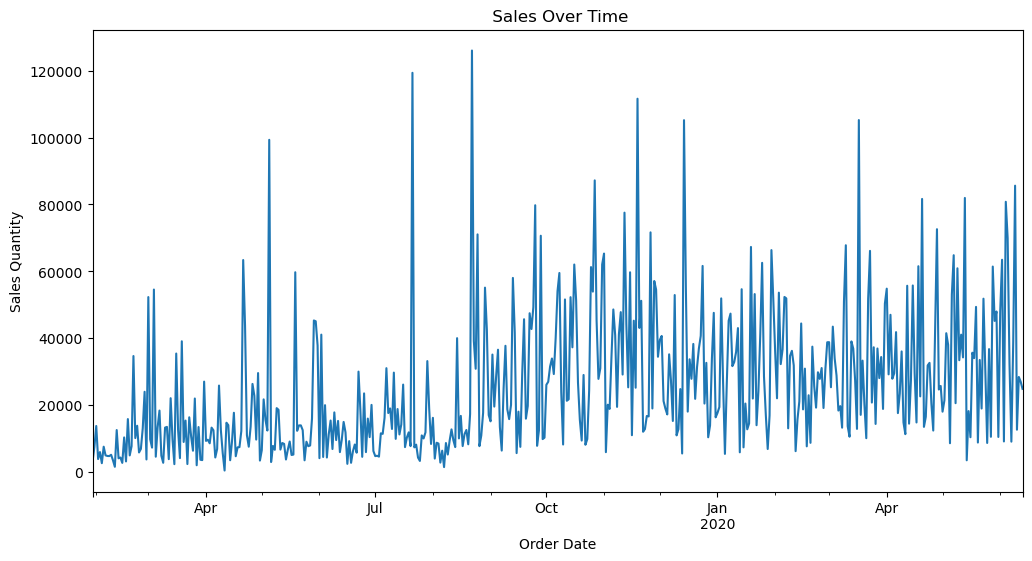

In [32]:
## Sales over time
sales_by_date = merged_df.groupby('Order Date')['Order Quantity'].sum()
plt.figure(figsize=(12, 6))
sales_by_date.plot(kind='line')
plt.title(' Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Quantity')
plt.show()

To analyze the monthly sales trend, the 'Date' column in the merged_df DataFrame was converted to datetime data type. The month and year were extracted from the 'Date' column and used to group the data by month. The total sales for each month were calculated and plotted using a bar plot. This plot can help us visualize the monthly sales trend and identify any seasonal patterns in the data.

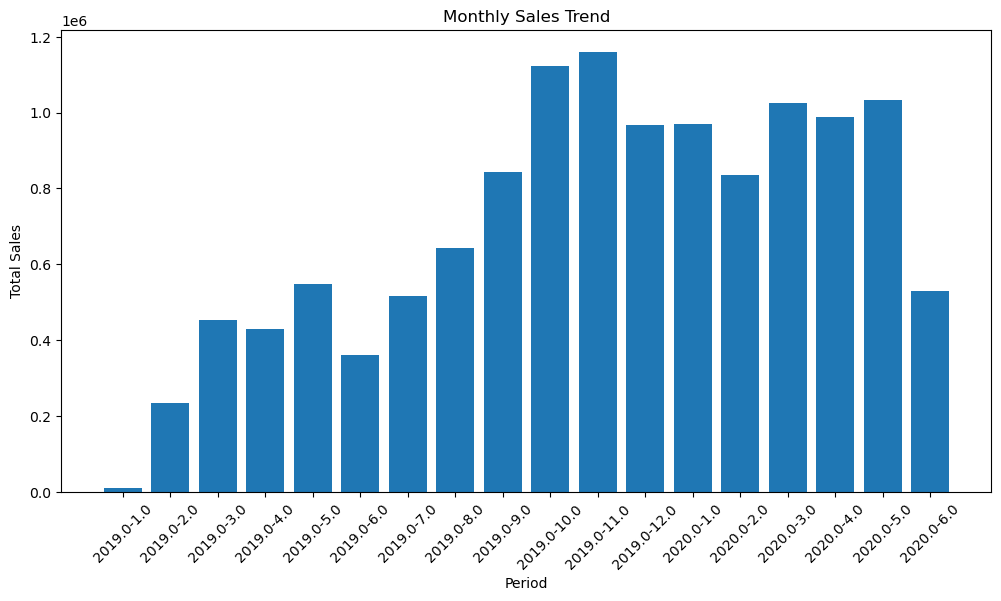

In [110]:
# Monthly Sales Trends.

# Convert 'Date' column to datetime data type
merged_df['Date'] = pd.to_datetime(merged_df['Order Date'])

# Extract the month and year from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year

# Group the data by month and calculate the total sales for each month
monthly_sales = merged_df.groupby(['Year', 'Month'])['Order Quantity'].sum()

# Reset the index to access the year and month as columns
monthly_sales = monthly_sales.reset_index()

# Combine the year and month columns into a single 'Period' column
monthly_sales['Period'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)
# Plotting the sales trend using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Period'], monthly_sales['Order Quantity'])
plt.title('Monthly Sales Trend')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

To analyze the sales performance of products, the sales data was grouped by SKU IDs and the total sales quantities were calculated. The SKU IDs were then ranked based on their sales quantities to identify the top-selling products. A bar plot was used to show the sales distribution across SKU IDs. This analysis can help us identify the most profitable products and optimize our sales and marketing efforts.

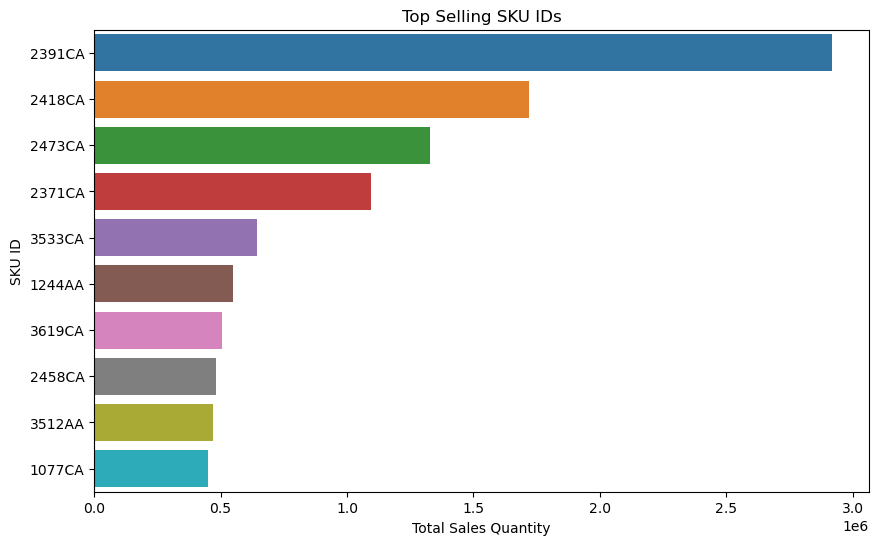

In [34]:
# Identify top-selling SKU IDs
top_selling_skus = merged_df.groupby('SKU ID')['Order Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top-selling SKU IDs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_skus.values, y=top_selling_skus.index)
plt.title('Top Selling SKU IDs')
plt.xlabel('Total Sales Quantity')
plt.ylabel('SKU ID')
plt.show()

This plot helps visualize the top 10 products that generate the most revenue for the company, which can help the company optimize its inventory and marketing strategies to further increase its revenue and profits.

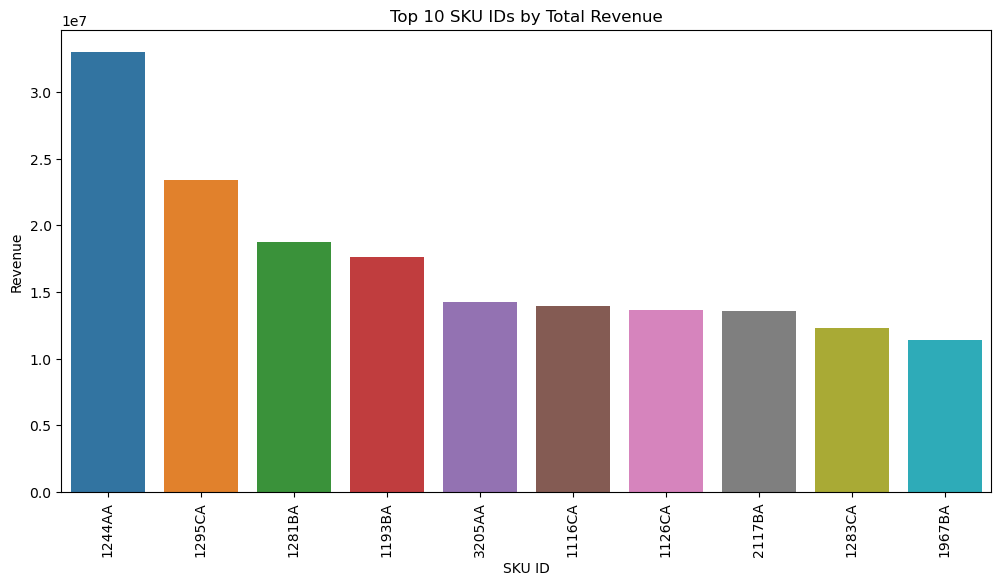

In [35]:
merged_df['Total Revenue'] = merged_df['Order Quantity'] * merged_df['Unit Price']
total_revenue = merged_df['Total Revenue'].sum()
total_revenue_by_sku = merged_df.groupby('SKU ID')['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in descending order
total_revenue_by_sku = total_revenue_by_sku.sort_values('Total Revenue', ascending=False)

# Select the top 10 SKU IDs
top_10_sku = total_revenue_by_sku.head(10)

# Plot the top 10 SKU IDs by total revenue using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_sku, x='SKU ID', y='Total Revenue')
plt.title('Top 10 SKU IDs by Total Revenue')
plt.xlabel('SKU ID')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

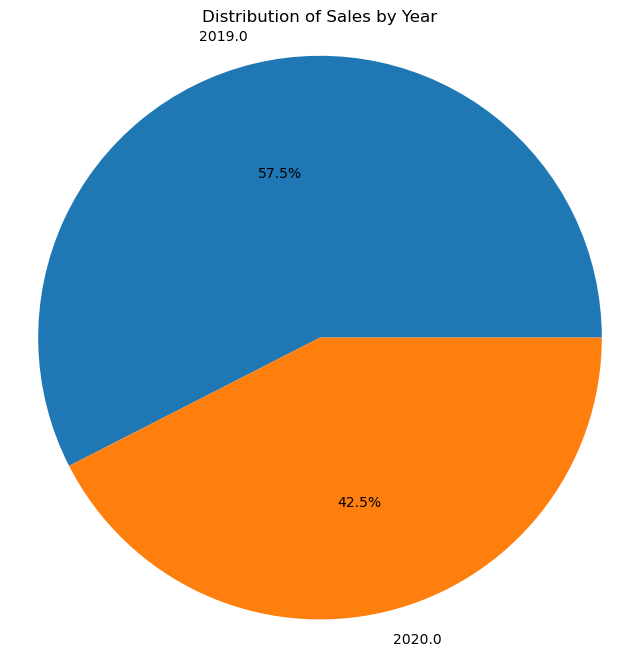

In [50]:
# Group the data by Year and calculate the total order quantity
yearly_order_quantity = merged_df.groupby('Year')['Order Quantity'].sum()

# Plot the pie chart for order quantity by year
plt.figure(figsize=(8, 8))
plt.pie(yearly_order_quantity, labels=yearly_order_quantity.index, autopct='%1.1f%%')
plt.title('Distribution of Sales by Year')
plt.axis('equal')
plt.show()

In [138]:
merged_df

,Order Date,SKU ID,Order Quantity,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Year,Date,Month,Total Revenue,Stock Difference
0,2019-11-19,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019.0,2019-11-19,11.0,2769.810000,43.000000
1,2020-04-23,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020.0,2020-04-23,4.0,2769.810000,43.000000
2,2019-12-03,3084CA,1.000000,44.0,Kg,30,45,2769.81,2019.0,2019-12-03,12.0,2769.810000,43.000000
3,2020-03-24,3084CA,1.000000,44.0,Kg,30,45,2769.81,2020.0,2020-03-24,3.0,2769.810000,43.000000
4,2019-03-31,3084CA,2.000000,44.0,Kg,30,45,2769.81,2019.0,2019-03-31,3.0,5539.620000,42.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,NaT,1196AA,6.277239,1253.0,Kg,90,128,30.00,NaN,NaT,NaN,188.317164,1246.722761
33597,NaT,1196AA,8.419679,1253.0,Kg,90,128,30.00,NaN,NaT,NaN,252.590375,1244.580321
33598,NaT,1196AA,1.819506,1253.0,Kg,90,128,30.00,NaN,NaT,NaN,54.585186,1251.180494
33599,NaT,1196AA,4.609129,1253.0,Kg,90,128,30.00,NaN,NaT,NaN,138.273881,1248.390871


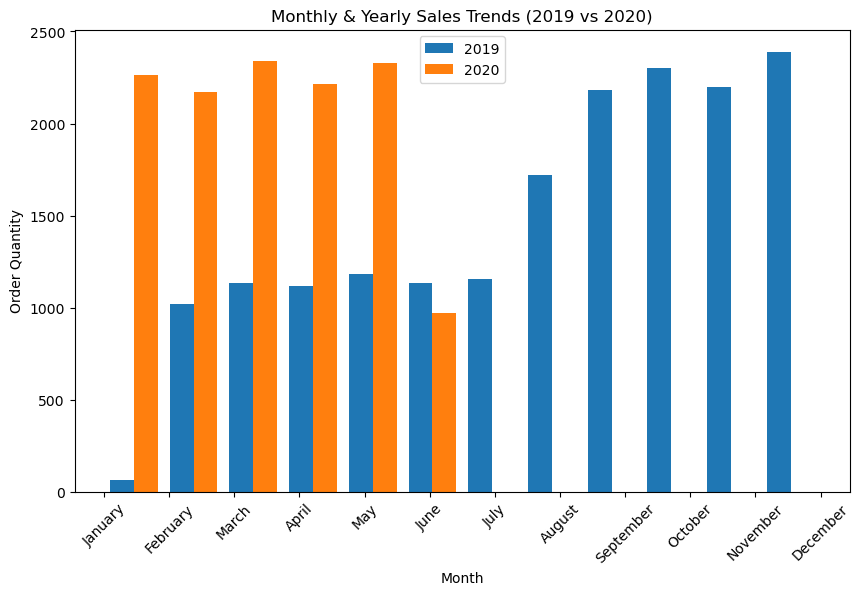

In [112]:
plt.figure(figsize=(10, 6))
plt.hist([sales_2019['Month'], sales_2020['Month']], bins=12, label=['2019', '2020'])
plt.title('Monthly & Yearly Sales Trends (2019 vs 2020)')
plt.xlabel('Month')
plt.ylabel('Order Quantity')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.legend()
plt.show()


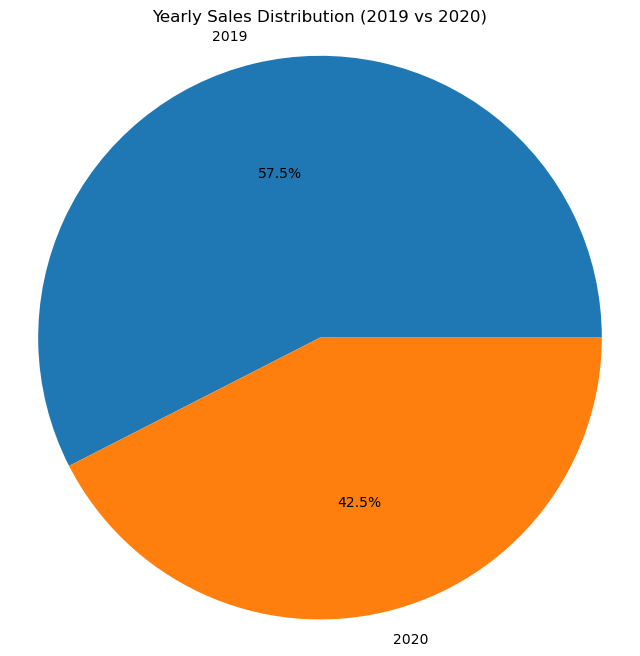

In [55]:
plt.figure(figsize=(8, 8))
plt.pie([monthly_sales_2019.sum(), monthly_sales_2020.sum()], labels=['2019', '2020'], autopct='%1.1f%%')
plt.title('Yearly Sales Distribution (2019 vs 2020)')
plt.axis('equal')
plt.show()


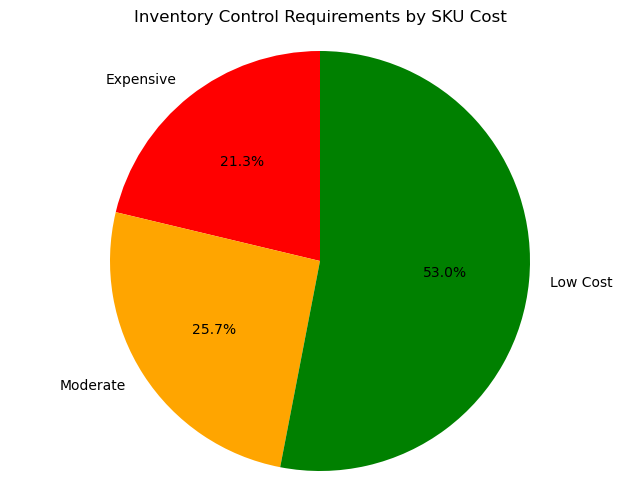

In [68]:
# Categorize SKU IDs based on cost
expensive_skus = merged_df[merged_df['Unit Price'] > 1000]['SKU ID']
moderate_skus = merged_df[(merged_df['Unit Price'] <= 1000) & (merged_df['Unit Price'] > 100)]['SKU ID']
low_cost_skus = merged_df[merged_df['Unit Price'] <= 100]['SKU ID']

# Count the number of SKUs in each category
expensive_count = len(expensive_skus)
moderate_count = len(moderate_skus)
low_cost_count = len(low_cost_skus)

# Create labels and sizes for the pie chart
labels = ['Expensive', 'Moderate', 'Low Cost']
sizes = [expensive_count, moderate_count, low_cost_count]

# Set colors for the pie chart
colors = ['red', 'orange', 'green']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Inventory Control Requirements by SKU Cost')

# Set aspect ratio to make the pie chart a circle
plt.axis('equal')

# Show the plot
plt.show()


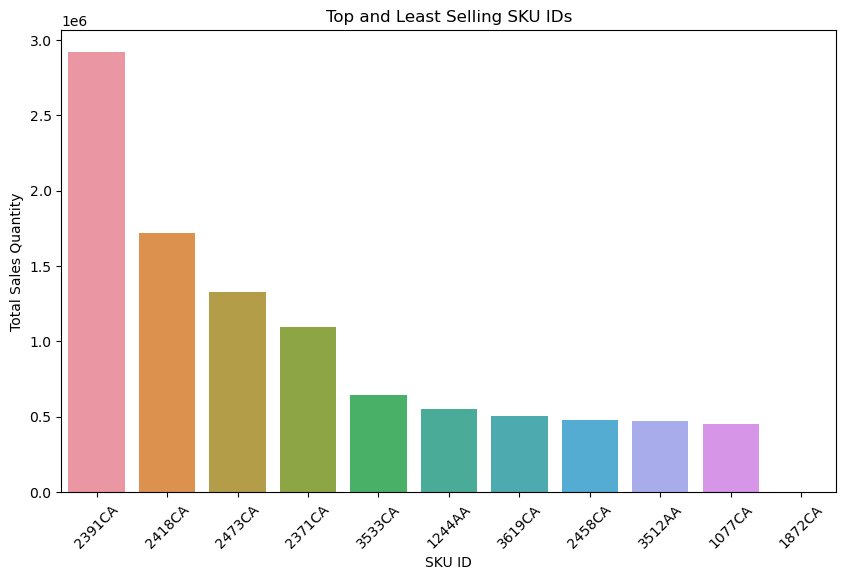

In [81]:
# Identify top-selling and least-selling SKU IDs
top_selling_skus = merged_df.groupby('SKU ID')['Order Quantity'].sum().sort_values(ascending=False).head(10)
least_selling_sku = merged_df.groupby('SKU ID')['Order Quantity'].sum().sort_values(ascending=True).head(1)

# Combine the top-selling and least-selling SKU IDs
combined_skus = pd.concat([top_selling_skus, least_selling_sku])

# Plot the combined SKU IDs
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_skus.index, y=combined_skus.values)
plt.title('Top and Least Selling SKU IDs')
plt.xlabel('SKU ID')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()


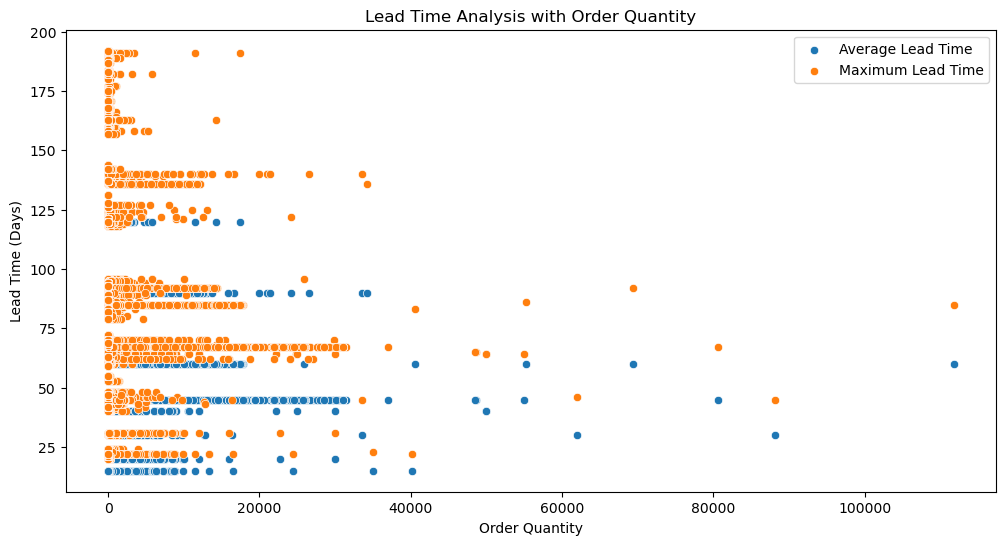

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the data for lead time analysis
lead_time_data = merged_df[['Average Lead Time (days)', 'Maximum Lead Time (days)', 'Order Quantity']]

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the scatter plot for average lead time
sns.scatterplot(data=lead_time_data, x='Order Quantity', y='Average Lead Time (days)', label='Average Lead Time')

# Plot the scatter plot for maximum lead time
sns.scatterplot(data=lead_time_data, x='Order Quantity', y='Maximum Lead Time (days)', label='Maximum Lead Time')

# Add labels and title
plt.title('Lead Time Analysis with Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Lead Time (Days)')

# Show the plot
plt.legend()
plt.show()


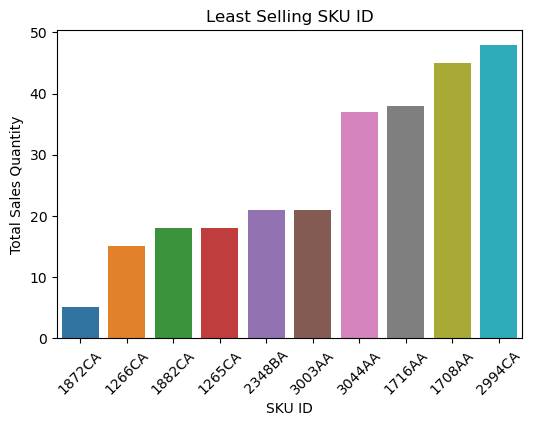

In [115]:
# Identify least-selling SKU ID
least_selling_sku = merged_df.groupby('SKU ID')['Order Quantity'].sum().sort_values(ascending=True).head(10)

# Plot the least-selling SKU ID
plt.figure(figsize=(6, 4))
sns.barplot(x=least_selling_sku.index, y=least_selling_sku.values)
plt.title('Least Selling SKU ID')
plt.xlabel('SKU ID')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.show()


In [121]:
monthly_data = sku_data.groupby(sku_data['Order Date'].dt.month)['Unit Price', 'Order Quantity'].agg({'Unit Price': 'mean', 'Order Quantity': 'sum'})


C:\Users\Abdul\AppData\Local\Temp\ipykernel_14828\2257816487.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_data = sku_data.groupby(sku_data['Order Date'].dt.month)['Unit Price', 'Order Quantity'].agg({'Unit Price': 'mean', 'Order Quantity': 'sum'})


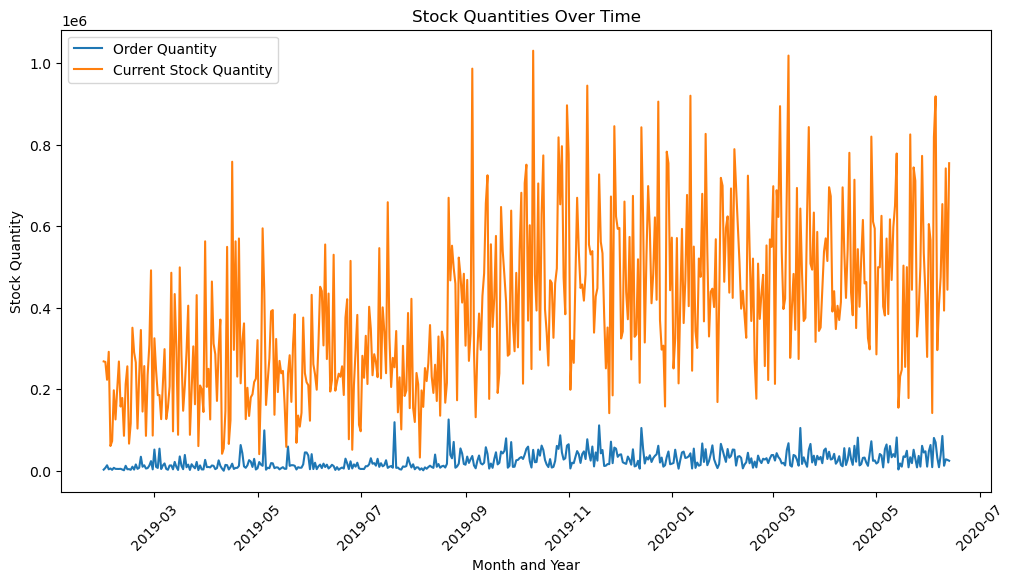

In [130]:
# Group the data by Order Date and calculate the total Order Quantity and Current Stock Quantity
order_quantity = merged_df.groupby('Order Date')['Order Quantity'].sum()
stock_quantity = merged_df.groupby('Order Date')['Current Stock Quantity'].sum()

# Create a line graph for Order Quantity and Current Stock Quantity
plt.figure(figsize=(12, 6))
plt.plot(order_quantity.index, order_quantity.values, label='Order Quantity')
plt.plot(stock_quantity.index, stock_quantity.values, label='Current Stock Quantity')

# Set the x-axis labels as month and year
plt.xticks(rotation=45)
plt.xlabel('Month and Year')

# Set the plot title and axis labels
plt.title('Stock Quantities Over Time')
plt.ylabel('Stock Quantity')

# Add a legend
plt.legend()

# Show the plot
plt.show()



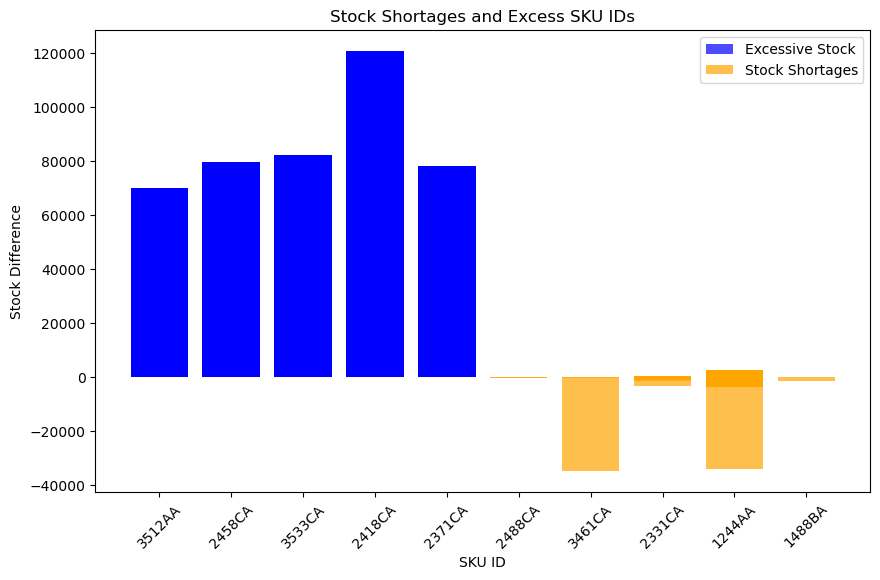

In [137]:
import matplotlib.pyplot as plt

# Define the threshold for stock shortage and excess
threshold_shortage = 10
threshold_excess = 100

# Calculate the stock difference for each SKU ID
merged_df['Stock Difference'] = merged_df['Current Stock Quantity'] - merged_df['Order Quantity']

# Identify the top and least SKU IDs
top_skus = merged_df.groupby('SKU ID')['Stock Difference'].sum().nlargest(5).index
least_skus = merged_df.groupby('SKU ID')['Stock Difference'].sum().nsmallest(5).index

# Filter the data for top and least SKU IDs
top_skus_data = merged_df[merged_df['SKU ID'].isin(top_skus)]
least_skus_data = merged_df[merged_df['SKU ID'].isin(least_skus)]

# Create a bar plot to visualize stock shortages and excess for top and least SKU IDs
plt.figure(figsize=(10, 6))
plt.bar(top_skus_data['SKU ID'], top_skus_data['Stock Difference'], color='blue', alpha=0.7, label='Excessive Stock')
plt.bar(least_skus_data['SKU ID'], least_skus_data['Stock Difference'], color='orange', alpha=0.7, label='Stock Shortages')

# Set the plot title and axis labels
plt.title('Stock Shortages and Excess SKU IDs')
plt.xlabel('SKU ID')
plt.ylabel('Stock Difference')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
